In [1]:
import mplfinance as fplt
import numpy as np
import datetime as dt
from markets.realistic import Statistician, Clock

In [2]:
stat = Statistician()

clock = Clock()

price = 123.34 
for i in range(3000):
    stat.report_transaction('TSMC', np.random.normal(2000, 1000), 
                            price, clock)
    price += np.random.normal(.001, .2)
    clock.tick()

today = dt.datetime.today()

tsmc_data = stat.get_chart_data('TSMC', today)
tsmc_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-28 13:31:37.946300,123.34,123.71,121.50,121.94,136343.0
2020-11-28 13:32:37.946300,121.90,123.93,121.80,123.61,102727.0
2020-11-28 13:33:37.946300,123.60,125.77,123.21,125.77,119559.0
2020-11-28 13:34:37.946300,125.72,126.31,121.88,122.31,132615.0
2020-11-28 13:35:37.946300,122.28,123.56,121.91,122.17,120505.0


In [3]:
def plot(data):
    mc = fplt.make_marketcolors(
                                up='green',down='red',
                                edge='yellow',
                                wick='inherit',
                                volume='inherit',
                                ohlc='inherit'
                               )
    s  = fplt.make_mpf_style(base_mpl_style='seaborn', marketcolors=mc, mavcolors=["green", "red", "purple"])

    fplt.plot(data,
              type='candle',
              style=s, #'charles',
              title=f'TSMC {today}',
              ylabel='Price ($)',
              volume=True,
              ylabel_lower='Shares\nTraded',
              figratio=(30, 10),
    )

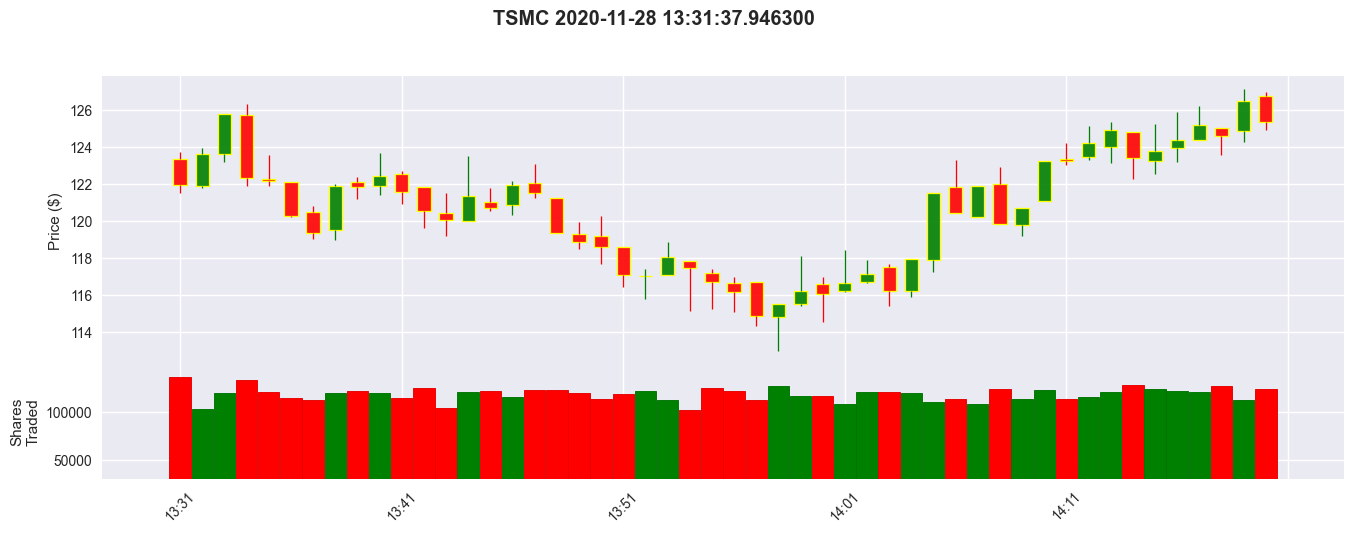

In [4]:
plot(tsmc_data)

In [5]:
from markets.realistic.ensembles.minimum import ensemble, _raphi_ as raphi
from markets.realistic import SynchronousMarketScenario, RayMarketScenario

In [6]:
sc = SynchronousMarketScenario()

In [7]:
np.random.seed(17)

clock = Clock(n_seconds=5, n_minutes=60, n_hours=24, n_days=256)

sc.register_ensemble(ensemble)


In [8]:
for i in range(180):
    sc.tick(seconds=1)

In [9]:
chart_data = raphi.get_chart_data('TSMC')

In [10]:
chart_data

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-18 19:10:36.033081,186.08,190.27,182.31,182.31,1076.0


In [11]:
sc.clock

0-0 0:3:0

In [12]:
raphi.minute_data

defaultdict(<function markets.realistic.Statistician.Statistician.__init__.<locals>.<lambda>()>,
            {'TSMC': defaultdict(<function markets.realistic.Statistician.Statistician.__init__.<locals>.<lambda>.<locals>.<lambda>()>,
                         {0: {'Open': (1, 186.08),
                           'High': 190.27,
                           'Low': 182.31,
                           'Close': (21, 182.31),
                           'Volume': 1076.0}})})

In [13]:
raphi.osid()

'(22225-4956688832)'